# <span style="color:red"> Estimating a population characteristic from a sample </span>

In [1]:
# Import modules 

import numpy as np
from datascience import *
# from datascience_extensions import *
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

A summary of the methods for Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

### <span style="color:blue"> Basics of sampling </span>

[Slides](https://github.com/wstuetzle/STAT180/raw/master/Lectures/Sampling/lec2.ppt)

### <span style="color:blue"> An experiment to study the performance of sampling </span>

Here is a data set recording the flight delays for United Airlines flights taking off from SFO during the third quarter of 2015.

In [2]:
# delay_tab = Table.read_table("united.csv")
delay_tab = Table.read_table("https://github.com/wstuetzle/STAT180/raw/master/Lectures/Sampling/united.csv")
N = delay_tab.num_rows
delay_tab.show(5)
delay_tab.take(np.arange(N - 5, N))

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64


Date,Flight Number,Destination,Delay
8/31/15,1978,LAS,-4
8/31/15,1993,IAD,8
8/31/15,1994,ORD,3
8/31/15,2000,PHX,-1
8/31/15,2013,EWR,-2


For our experiment we look at the delays

In [3]:
print ("min = " + str(np.min(delay_tab.column("Delay"))))
print ("max = " + str(np.max(delay_tab.column("Delay"))))
print ("mean = " + str(np.mean(delay_tab.column("Delay"))))
print ("median = " + str(np.median(delay_tab.column("Delay"))))

min = -10
max = 299
mean = 15.8086221963
median = 2.0


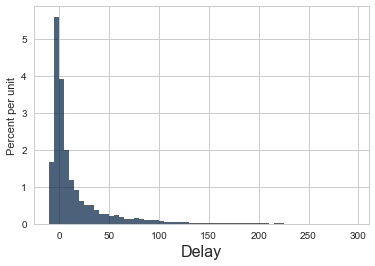

In [4]:
delay_tab.hist("Delay", bins = np.arange(-10, 300, 5))

In [5]:
# Let's see how many flights took off early

delay_tab.where("Delay", are.below(0)).num_rows

# Wow - I wonder why that is

# For our experiment, let's focus on delays below 100 minutes

delay_tab = delay_tab.where("Delay", are.below(100))

N = delay_tab.num_rows
N

13217

** We want to perform an experiment to find out how accurately we can estimate the mean delay for all 13,732 flights from the delays for a simple random sample of the flights **

("Simple random sample" means all possible samples are equally likely to be chosen.

In our lingo, 
* the N = 13,217 flights are the population of interest
* the population parameter of interest is the mean delay
* we will estimate the population mean by the mean of a simple random sample of a chosen size n from the population
* We will first simulate sampling with replacement. 

Sampling with replacement is easier to analyze, and the performance is similar to sampling without replacement, as long as the sample size is a small fraction of the population size (< 10%)

In [6]:
# Let's see some examples for sample size n = 16

population_mean = np.mean(delay_tab.column("Delay"))
print("population mean = " + str(population_mean))

n = 16
wr = True
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))

# The mean of a sample of size 16 is not a very relaible estimate for the population mean

population mean = 10.5871226451
estimate =  5.9375
estimate =  8.1875
estimate =  5.4375
estimate =  1.4375
estimate =  9.5625


** Always keep in mind: ** 

* The estimate depends on which sample we happen to pick
* We could be unlucky and pick the 16 flights with the smallest delays, or the 16 flights with the longest delays, and the value of the statistic (the sample mean) would be very far away from the parameter of interest (the population mean)
* Therefore we can only analyze the performance of the sampling procedure on the average over samples.

In [7]:
# Let's try n = 1064

population_mean = np.mean(delay_tab.column("Delay"))
print("population mean = " + str(population_mean))

n = 1064
wr = True
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))
print("estimate = ", str(np.mean(delay_tab.sample(n, with_replacement = wr).column("Delay"))))

# These estimate are a lot closer to the true value

population mean = 10.5871226451
estimate =  10.2434210526
estimate =  9.86560150376
estimate =  9.39191729323
estimate =  11.3157894737
estimate =  11.7142857143


### <span style="color:blue"> Assessing the performance </span>

There are finitely many possible samples (N^n for sampling with replacement) which are all equally likely.

Let's take a look at 
* the average of the sample means  (for the N^n samples)
* the distribution (histogram) of the sample means (for the N^n samples)
* the standard deviation of the sample means (for the N^n samples)

for different sample sizes (n = 4, 14, 64, 256, 1024)

In our experiment we can't average over all N^n sample - there are too many of them.
So instead we randomly pick a large number of them.


In [8]:
# Here is a function that evaluates a statistic (think np.mean) for
# num_samples samples of size sample_size from delay.tab

def evaluate_statistic_for_random_samples(statistic, sample_size, num_samples, with_replacement):
    estimates = np.zeros(num_samples)
    for i in range(num_samples):
        sample = delay_tab.select("Delay").sample(sample_size, with_replacement).column("Delay")
        estimates[i] = statistic(sample)
        if i % 10000 == 0:
            print(str(i) + " ", end = "")
    return(estimates)

In [9]:
# Calculate the sample means for 1,000,000 randomly drawn samples of sizes 
# 4, 16, 64, 256, 1024 with replacement

# sample_sizes = [4, 16, 64, 256, 1024]
# nrep = 1000000  # number of samples

# wr = True       # with replacement
# stat = np.mean

# This calculation takes a while. I therefoee pre-computed the table and saved it.

# estimates_tab = Table()
# for n in sample_sizes:
#    estimates = evaluate_statistic_for_random_samples(stat, n, nrep, wr)
#    estimates_tab = estimates_tab.with_column(str(n), estimates)
# estimates_tab.to_csv("mean-with-replacement.csv")

In [10]:
# Calculate the sample medians for 1,000,000 randomly drawn samples of sizes 
# 4, 16, 64, 256, 1024 with replacement

# sample_sizes = [4, 16, 64, 256, 1024]
# nrep = 1000000  # number of samples

# wr = True       # with replacement
# stat = np.median

# estimates_tab = Table()
# for n in sample_sizes:
#     estimates = evaluate_statistic_for_random_samples(stat, n, nrep, wr)
#    estimates_tab = estimates_tab.with_column(str(n), estimates)
# estimates_tab.to_csv("median-with-replacement.csv")

In [11]:
# Calculate the sample means for 1,000,000 randomly drawn samples of sizes 
# 4, 16, 64, 256, 1024 without replacement

# sample_sizes = [4, 16, 64, 256, 1024]
# nrep = 1000000   # number of samples

# wr = False       # without replacement
# stat = np.mean

# estimates_tab = Table()
# for n in sample_sizes:
#     estimates = evaluate_statistic_for_random_samples(stat, n, nrep, wr)
#     estimates_tab = estimates_tab.with_column(str(n), estimates)
# estimates_tab.to_csv("mean-without-replacement.csv")

In [12]:
# Calculate the sample medians for 1,000,000 randomly drawn samples of sizes 
# 4, 16, 64, 256, 1024 without replacement

# sample_sizes = [4, 16, 64, 256, 1024]
# nrep = 1000000   # number of samples

# wr = False       # without replacement
# stat = np.median

# estimates_tab = Table()
# for n in sample_sizes:
#     estimates = evaluate_statistic_for_random_samples(stat, n, nrep, wr)
#     estimates_tab = estimates_tab.with_column(str(n), estimates)
# estimates_tab.to_csv("median-without-replacement.csv")

##  <span style="color:purple"> 0. Read table of sample means for samples drawn without replacement </span>

In [13]:
# pathname = "https://github.com/wstuetzle/STAT180/raw/master/Lectures/Sampling/mean-with-replacement.csv"
# estimates_tab = Table.read_table(pathname)
estimates_tab = Table.read_table("mean-with-replacement.csv")
estimates_tab.show(5)
stat = np.mean
population_parameter = stat(delay_tab.column("Delay"))
sample_sizes = [4, 16, 64, 256, 1024]

4,16,64,256,1024
4,10.4375,11.125,9.73438,10.917
14,21.5625,11.4531,11.9766,11.6143
3.75,25.3125,9.71875,9.42578,10.832
19.5,6.5625,6.15625,9.1875,11.1426
20.25,4.8125,8.79688,12.9766,11.3584


##  <span style="color:purple"> 1. Calculate the average of the estimates for the different sample sizes </span>

In [14]:
# Compute the average of estimates for the different sample sizes

ns = len(sample_sizes)
for i in np.arange(ns):
    ave_of_estimates = np.mean(estimates_tab.column(i))
    print("n = " + str(sample_sizes[i]) + "  average_of_estimates = " + str(ave_of_estimates))

print("population parameter = " + str(population_mean))


n = 4  average_of_estimates = 10.5901505
n = 16  average_of_estimates = 10.5883341875
n = 64  average_of_estimates = 10.5849340625
n = 256  average_of_estimates = 10.5899295039
n = 1024  average_of_estimates = 10.5875377588
population parameter = 10.5871226451


## <span style="color:purple"> Finding 1: The sample mean is an unbiased estimate of the population mean </span>
(Can be proven mathematically)

## <span style="color:purple"> 2. Draw histograms of the estimates for the different sample sizes </span>

First all on the same scale

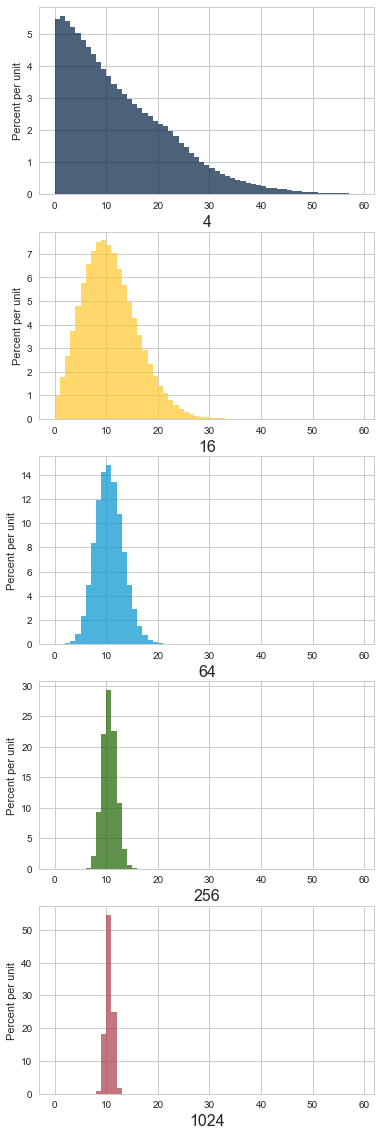

In [15]:
# 

estimates_tab.hist("4", "16", "64", "256", "1024", bins = np.arange(0, 60, 1), overlay = False)

## <span style="color:purple"> Finding 2a: As the sample size increases, the sample means cluster more and more tighly around the population mean </span>

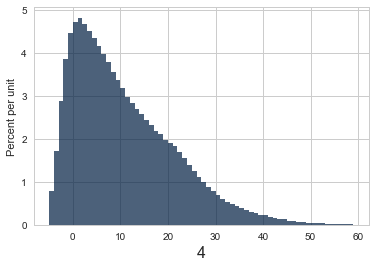

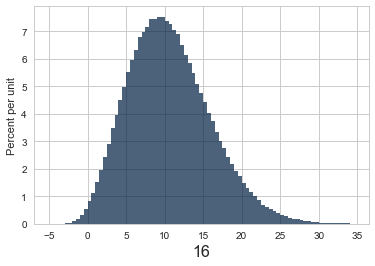

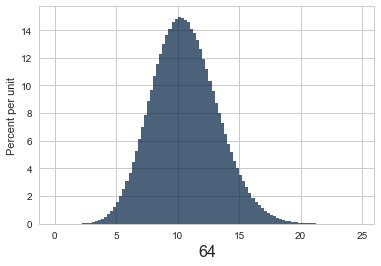

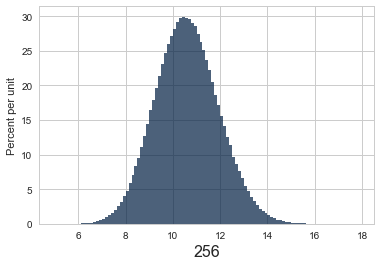

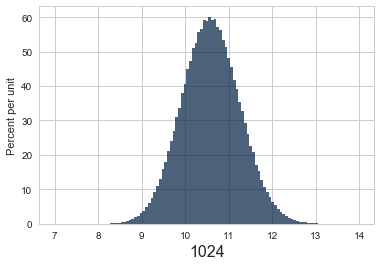

In [16]:
# Now draw histograms on individual scales

estimates_tab.hist("4", bins = np.arange(-5, 60, 1))
estimates_tab.hist("16", bins = np.arange(-5, 35, 0.5))
estimates_tab.hist("64", bins = np.arange(0, 25, 0.25))
estimates_tab.hist("256", bins = np.arange(5, 18, 0.125))
estimates_tab.hist("1024", bins = np.arange(7, 14, 0.063))

## <span style="color:purple"> Finding 2b: As the sample size increases, the distribution (histogram) of the sample means approaches a bell shaped curve"  which is called the Gaussian (or "normal") distribution. </span>
(Can be proven mathematically)

## <span style="color:purple"> 3. Calculate the std of the sample means (also called the "standard error") for the different sample sizes

In [17]:
ns = len(sample_sizes)
population_std = np.std(delay_tab.column("Delay"))
for i in np.arange(ns):
    std_of_estimates = np.std(estimates_tab.column(i))
    print("n = " + str(sample_sizes[i]) + "  std_of_estimates = " + str(std_of_estimates), end = "")
    print("  population std / n^0.5 = " + str(population_std / sample_sizes[i] ** 0.5))

n = 4  std_of_estimates = 10.6867565478  population std / n^0.5 = 10.6819771863
n = 16  std_of_estimates = 5.34508943055  population std / n^0.5 = 5.34098859317
n = 64  std_of_estimates = 2.66854616728  population std / n^0.5 = 2.67049429659
n = 256  std_of_estimates = 1.33579795361  population std / n^0.5 = 1.33524714829
n = 1024  std_of_estimates = 0.667293458143  population std / n^0.5 = 0.667623574146


## <span style="color:purple"> Finding 3: The std of sample means of random samples of size n is population std / n^(1/2)
(Can be proven mathematically)

##  <span style="color:purple"> 4. Calculate the fraction of sample means that are within +- 2 * (std of sample means) from the population mean </span>

In [18]:
population_std = np.std(delay_tab.column("Delay"))
population_parameter = np.mean(delay_tab.column("Delay"))

ns = len(sample_sizes)
for i in np.arange(ns):
    lab = estimates_tab.labels[i]
    ni = sample_sizes[i]
    std_of_means = population_std / (ni ** 0.5)
    estimates_within = estimates_tab.where(lab, are.between((population_mean - 2 * std_of_means),
                                                            (population_mean + 2 * std_of_means)))
    fraction_within = estimates_within.num_rows / estimates_tab.num_rows
    print("n = " + str(ni) + "  fraction within interval = " + str(fraction_within))


n = 4  fraction within interval = 0.955503
n = 16  fraction within interval = 0.959824
n = 64  fraction within interval = 0.956197
n = 256  fraction within interval = 0.954879
n = 1024  fraction within interval = 0.954883


## <span style="color:purple"> Finding 4: About 95% of sample means are within +- 2 * (std of sample means) from the population mean </span>
(This is a consequence of Finding 2b)